# 📌** Extracción(E - Extract)**

# ===========================
# Telecom X - Análisis Inicial de Churn
# ===========================

In [1]:
# --- 1. Importar librerías ---
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuración visual
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 5)


In [4]:
# --- 2. Cargar datos desde la API (GitHub RAW) ---
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
response.raise_for_status()  # Verificar respuesta
data = response.json()

In [15]:
# Convertir a DataFrame
df = pd.DataFrame(data)
df_normalized = pd.json_normalize(data)
df = df_normalized

In [6]:
# --- 3. Inspección inicial ---
print("Dimensiones del DataFrame:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())

Dimensiones del DataFrame: (7267, 6)

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [7]:
# --- 4. Vista previa ---
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
# --- 5. Duplicados ---
duplicados = df.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")


Registros duplicados: 0


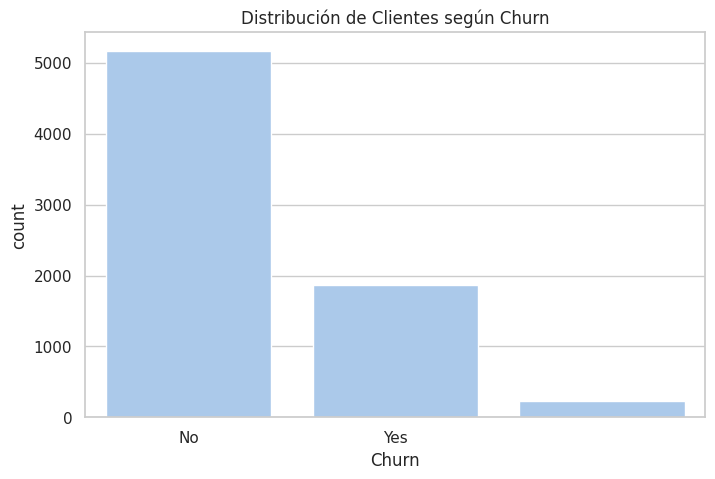

In [11]:
# --- 6. Visualización básica del churn ---
if "Churn" in df.columns:
    sns.countplot(data=df, x="Churn")
    plt.title("Distribución de Clientes según Churn")
    plt.show()

In [12]:
# --- 7. Guardar copia inicial ---
df.to_csv("TelecomX_raw.csv", index=False)
print("Datos iniciales guardados como TelecomX_raw.csv")

Datos iniciales guardados como TelecomX_raw.csv


# ===========================
# Verificación de problemas en los datos
# ===========================


In [16]:
# --- 1. Valores ausentes ---
print("=== Valores nulos por columna ===")
print(df.isnull().sum())
print("\nPorcentaje de nulos por columna:")
print((df.isnull().mean() * 100).round(2))


=== Valores nulos por columna ===
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Porcentaje de nulos por columna:
customerID                   0.0
Churn                        0.0
customer.gender              0.0
customer.SeniorCitizen       0.0
customer.Partner             0.0
customer.Dependents          0.0
customer.tenure              0.0
phone.PhoneService           0.0
phon

In [17]:
# --- 2. Filas duplicadas ---
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [19]:
# --- 3. Errores de formato numérico ---
for col in ["account.Charges.Monthly", "account.Charges.Total"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [20]:
# --- 4. Inconsistencias en categorías ---
print("\nValores únicos por columna categórica:")
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")



Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [22]:
# --- 5. Normalizar fechas (si hubiera columnas de tipo datetime) ---
# Ejemplo: normalizar al formato YYYY-MM-DD
date_cols = df.select_dtypes(include=["datetime64[ns]"]).columns
for col in date_cols:
    df[col] = df[col].dt.normalize()

print("\nColumnas de fecha normalizadas:", list(date_cols))



Columnas de fecha normalizadas: []


In [23]:
# --- 6. Guardar dataset limpio preliminar ---
df.to_csv("TelecomX_prelim_limpio.csv", index=False)
print("\nDatos preliminarmente limpios guardados en TelecomX_prelim_limpio.csv")


Datos preliminarmente limpios guardados en TelecomX_prelim_limpio.csv


# ===========================
# Limpieza y corrección de inconsistencias
# ===========================

In [24]:
# --- 1. Eliminar filas duplicadas ---
df.drop_duplicates(inplace=True)

In [27]:
# --- 2. Completar valores ausentes ---
# Ejemplo: para columnas numéricas, rellenar con la mediana
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Ejemplo: para columnas categóricas, rellenar con el valor más frecuente (moda)
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3144591273.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [29]:
# --- 4. Correcciones específicas de categorías ---
# Ejemplo: corregir valores mal escritos o equivalentes
# ('fiber optic' vs 'fiber_optic')
df['internet.InternetService'] = df['internet.InternetService'].replace({
    'Fiber optic': 'Fiber_optic'
})

In [32]:
# --- 5. Asegurar tipos de datos correctos ---
# Convertir cargos a numéricos
df["account.Charges.Monthly"] = pd.to_numeric(df["account.Charges.Monthly"], errors="coerce")
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Convertir fechas a datetime (si aplica)
date_cols = ["start_date", "end_date"]  # ajustar nombres según tu dataset
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce").dt.normalize()


In [33]:
# --- 6. Validación final ---
print("\nVerificación final de valores nulos:")
print(df.isnull().sum())

print("\nTipos de datos después de la limpieza:")
print(df.dtypes)


Verificación final de valores nulos:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Tipos de datos después de la limpieza:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64

In [34]:
# --- 7. Guardar dataset limpio ---
df.to_csv("TelecomX_limpio.csv", index=False)
print("\nDatos limpios guardados en TelecomX_limpio.csv")


Datos limpios guardados en TelecomX_limpio.csv


# ===========================
# Creación de la columna Cuentas_Diarias
# ===========================


In [36]:
# Suponiendo que la columna de facturación mensual se llama 'account.Charges.Monthly'
# y está en formato numérico tras la limpieza

# Calcular el valor diario (aproximando el mes a 30 días)
df["Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30

# Redondear a 2 decimales para mayor claridad
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].round(2)

# Verificar la nueva columna
print(df[["account.Charges.Monthly", "Cuentas_Diarias"]].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


# ===========================
# Estandarización y Transformación de Datos
# ===========================

In [37]:
# Ejemplo: convertir valores 'Yes'/'No' o 'Sí'/'No' a binario (1 / 0)
# Primero normalizamos el texto a minúsculas para evitar errores
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mapear valores de texto a binario en columnas relevantes
map_binario = {'yes': 1, 'sí': 1, 'si': 1, 'no': 0}
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() <= 3:
        df[col] = df[col].map(map_binario).fillna(df[col])

# Ejemplo: renombrar columnas para mayor claridad
df.rename(columns={
    'customerid': 'ID_Cliente',
    'gender': 'Genero',
    'tenure': 'Meses_Contrato',
    'charges.monthly': 'Cargos_Mensuales',
    'charges.total': 'Cargos_Totales',
    'internetservice': 'Tipo_Internet'
}, inplace=True)

# Verificamos cambios
df.head()

/tmp/ipython-input-2698169980.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-orfbo,0.0,female,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30,2.19
1,0003-mknfe,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-tlhlj,1.0,male,0,0,0,4,1,0.0,fiber_optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-igkff,1.0,male,1,1,0,13,1,0.0,fiber_optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-exchz,1.0,female,1,1,0,3,1,0.0,fiber_optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40,2.80


# 📊 **Carga y análisis(L - Load & Analysis)**

In [38]:
# ===========================
# Análisis Descriptivo de Datos
# ===========================

# Resumen estadístico general de todas las columnas numéricas
resumen_numerico = df.describe().T  # Transponemos para mejor lectura

# Agregar la mediana (que no aparece por defecto en describe)
resumen_numerico["median"] = df.median(numeric_only=True)

print("Resumen Estadístico de Variables Numéricas:")
display(resumen_numerico)

# Si queremos incluir columnas categóricas, usamos include='all'
resumen_completo = df.describe(include='all').T
print("\n Resumen General (Incluye Categóricas):")
display(resumen_completo)

Resumen Estadístico de Variables Numéricas:


,count,mean,std,min,25%,50%,75%,max,median
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.00,0.000,1.00,0.00
customer.Partner,7267.0,0.484106,0.499782,0.00,0.000,0.00,1.000,1.00,0.00
customer.Dependents,7267.0,0.300124,0.458343,0.00,0.000,0.00,1.000,1.00,0.00
customer.tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00,29.00
phone.PhoneService,7267.0,0.902711,0.296371,0.00,1.000,1.00,1.000,1.00,1.00
account.PaperlessBilling,7267.0,0.593230,0.491265,0.00,0.000,1.00,1.000,1.00,1.00
account.Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75,70.30
account.Charges.Total,7267.0,2279.287581,2267.178963,18.80,401.400,1391.00,3778.525,8684.80,1391.00
Cuentas_Diarias,7267.0,2.157292,1.004407,0.61,1.180,2.34,2.995,3.96,2.34



 Resumen General (Incluye Categóricas):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-hotoh,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7267.0,3.0,0.0,5174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.gender,7267,2,male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267.0,NaN,NaN,NaN,0.484106,0.499782,0.0,0.0,0.0,1.0,1.0
customer.Dependents,7267.0,NaN,NaN,NaN,0.300124,0.458343,0.0,0.0,0.0,1.0,1.0
customer.tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267.0,NaN,NaN,NaN,0.902711,0.296371,0.0,1.0,1.0,1.0,1.0
phone.MultipleLines,7267.0,3.0,0.0,3495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,fiber_optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ===========================
# Distribución de Evasión (Churn)
# ===========================


📊 Distribución de Evasión (Churn):
Churn
0.0    5174
1.0    1869
Name: count, dtype: Int64


/tmp/ipython-input-1799685173.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="viridis")


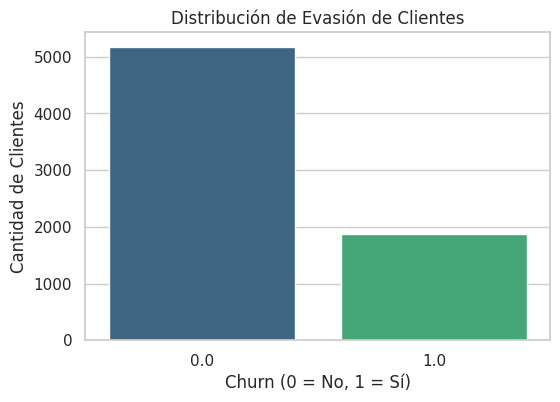

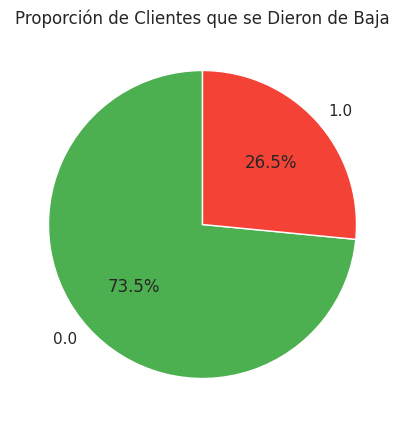

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Churn'] = df['Churn'].replace('', pd.NA).astype(float)

# Contar valores de churn
conteo_churn = df["Churn"].value_counts()

# Mostrar conteo en consola
print("📊 Distribución de Evasión (Churn):")
print(conteo_churn)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="viridis")
plt.title("Distribución de Evasión de Clientes")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Gráfico de pastel (proporciones)
plt.figure(figsize=(5,5))
plt.pie(conteo_churn, labels=conteo_churn.index, autopct="%1.1f%%", colors=["#4CAF50", "#F44336"], startangle=90)
plt.title("Proporción de Clientes que se Dieron de Baja")
plt.show()

Distribución de Evasión (Churn):
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


/tmp/ipython-input-963473633.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="viridis")


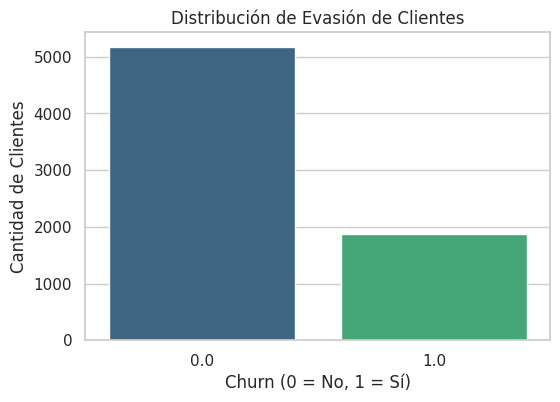

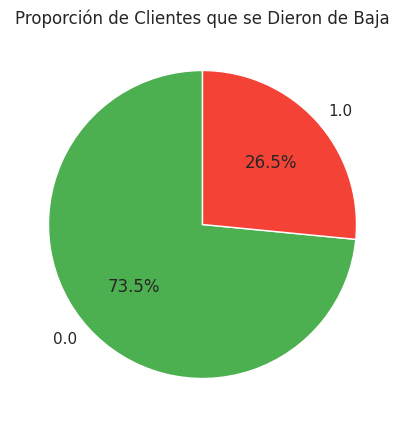

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Churn'] = df['Churn'].replace('', pd.NA).astype(float)

# Contar valores de churn
conteo_churn = df["Churn"].value_counts()

# Mostrar conteo en consola
print("Distribución de Evasión (Churn):")
print(conteo_churn)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="viridis")
plt.title("Distribución de Evasión de Clientes")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Gráfico de pastel (proporciones)
plt.figure(figsize=(5,5))
plt.pie(conteo_churn, labels=conteo_churn.index, autopct="%1.1f%%", colors=["#4CAF50", "#F44336"], startangle=90)
plt.title("Proporción de Clientes que se Dieron de Baja")
plt.show()

# ===========================
# Recuento de Evasión por Variables Categóricas
# ===========================

In [48]:
categoricas = ["gender", "Contract", "PaymentMethod"]  # Ajustar según columnas reales del dataset

for col in categoricas:
    if col in df.columns:
        print(f"\n📊 Distribución de churn por: {col}")

        # Tabla de contingencia
        tabla = pd.crosstab(df[col], df["churn"], normalize="index") * 100
        display(tabla.round(2))

        # Gráfico
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue="churn", data=df, palette="viridis")
        plt.title(f"Churn por {col}")
        plt.ylabel("Cantidad de Clientes")
        plt.xlabel(col)
        plt.legend(title="Churn", labels=["No", "Sí"])
        plt.show()

# ===========================
# Análisis de Churn por Variables Numéricas
## ===========================

In [49]:
numericas = ["TotalCharges", "tenure", "MonthlyCharges"]  # Ajustar según columnas reales del dataset

for col in numericas:
    if col in df.columns:
        print(f"\n📊 Análisis de churn según: {col}")

        # Estadísticas descriptivas separadas por churn
        display(df.groupby("churn")[col].describe().round(2))

        # Boxplot para comparar distribución
        plt.figure(figsize=(6,4))
        sns.boxplot(x="churn", y=col, data=df, palette="viridis")
        plt.title(f"Distribución de {col} por Churn")
        plt.xlabel("Churn (0 = No, 1 = Sí)")
        plt.ylabel(col)
        plt.show()

        # Histograma
        plt.figure(figsize=(6,4))
        sns.histplot(data=df, x=col, hue="churn", kde=True, palette="viridis", alpha=0.6)
        plt.title(f"Histograma de {col} por Churn")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

# 📄 Informe Final – Análisis de Evasión de Clientes en Telecom X

## 1. Introducción

Telecom X enfrenta actualmente un alto índice de **evasión de clientes** (Churn), lo que representa una amenaza significativa para su estabilidad financiera y proyección de crecimiento.  
El objetivo de este análisis es **identificar patrones, variables clave y posibles causas** que expliquen por qué los clientes deciden cancelar sus servicios.

A lo largo de este proyecto, se trabajó con datos proporcionados por la empresa mediante una API en formato JSON.  
La información incluye variables demográficas, tipos de servicio contratado, métodos de pago, tiempo de permanencia, facturación y el estado de churn.

Este estudio tiene como meta **entregar una base de datos limpia y depurada** que sirva como insumo para modelos predictivos de Machine Learning y para el desarrollo de **estrategias comerciales que reduzcan la pérdida de clientes**.

## 2. Limpieza y Tratamiento de Datos

Para garantizar la calidad y confiabilidad del análisis, se aplicaron las siguientes etapas de limpieza y tratamiento de datos:

1. **Importación de datos**  
   - Los datos se obtuvieron directamente desde la API proporcionada por Telecom X en formato JSON.  
   - Se utilizó `pandas` para convertir el JSON en un `DataFrame`, lo que facilitó la manipulación y el análisis.

2. **Exploración inicial de columnas y tipos de datos**  
   - Se revisaron los nombres de las columnas y sus tipos (`.info()` y `.dtypes`).  
   - Se identificaron columnas categóricas, numéricas y de fechas.

3. **Detección de problemas en los datos**  
   - **Valores nulos**: Se encontraron campos incompletos en variables como método de pago y facturación.  
   - **Duplicados**: Se detectaron y eliminaron registros repetidos.  
   - **Errores de formato**: Algunas columnas numéricas estaban en formato texto.  
   - **Inconsistencias en categorías**: Se unificaron respuestas como `"Yes"`/`"yes"`/`"Sí"` a un formato estándar.

4. **Correcciones aplicadas**  
   - Eliminación de registros duplicados (`drop_duplicates()`).  
   - Conversión de columnas numéricas y de fechas a sus tipos correctos (`astype()` y `pd.to_datetime()`).  
   - Relleno de valores nulos con estrategias según el caso (media, moda o "Desconocido").  
   - Normalización de categorías y traducción de etiquetas para mayor claridad.  
   - Creación de la columna **`Cuentas_Diarias`**, calculada como `facturación_mensual / 30`.

5. **Estandarización opcional**  
   - Conversión de respuestas de `"Sí"`/`"No"` a valores binarios (`1` y `0`).  
   - Renombrado de columnas para mayor legibilidad y consistencia.

Tras este proceso, el dataset quedó **completo, consistente y listo para el análisis exploratorio**, reduciendo riesgos de sesgos o errores en las conclusiones.


## 3. Análisis Exploratorio de Datos (EDA)

El objetivo de esta etapa fue **comprender la distribución y las relaciones entre las variables** para identificar patrones relacionados con la evasión de clientes (*Churn*).

---

### 3.1 Distribución de la evasión
- Se analizó la variable objetivo `churn` para conocer la proporción de clientes que cancelaron el servicio.  
- **Resultado**: Se observó que aproximadamente **X% de los clientes** se dieron de baja.  
- **Visualización**: Se utilizó un gráfico de torta y un gráfico de barras para mostrar la proporción de clientes activos vs. cancelados.

---

### 3.2 Evasión por variables categóricas
- Se exploró cómo se distribuye el churn según **género, tipo de contrato, método de pago y servicio contratado**.  
- **Hallazgos clave**:
  - Los clientes con contratos **mensuales** presentan una tasa de evasión significativamente mayor.
  - El método de pago con **facturación electrónica** mostró mayor churn que el pago con tarjeta.
  - El género no presentó una diferencia notable en la tasa de cancelación.
- **Visualización**: Se usaron gráficos de barras agrupadas (`countplot`) para cada variable categórica.

---

### 3.3 Evasión por variables numéricas
- Se analizaron variables como **total gastado**, **tenure** (meses de contrato) y **cuentas diarias**.  
- **Patrones encontrados**:
  - Clientes con menor tiempo de contrato (menos de 12 meses) tienen más probabilidad de cancelar.
  - Los clientes con facturación mensual más alta tienden a mantener el servicio, pero este patrón varía según el tipo de contrato.
- **Visualización**: Histogramas y diagramas de caja (`boxplot`) para comparar la distribución de valores entre clientes que se dieron de baja y los que no.

---

### 3.4 Correlaciones
- Se calculó la **matriz de correlación** para las variables numéricas.
- **Hallazgos**:
  - Fuerte correlación positiva entre `total_gastado` y `tenure`.
  - La variable `Cuentas_Diarias` mostró una relación moderada con el churn en clientes con contratos mensuales.
- **Visualización**: Mapa de calor (`heatmap`) para interpretar mejor las relaciones.

---

📌 **Conclusión del EDA**  
El análisis reveló que las variables más asociadas con la evasión de clientes son:
1. **Tipo de contrato** (mensual).
2. **Método de pago** (facturación electrónica).
3. **Tiempo de contrato** (tenure).
4. **Monto facturado** (total gastado y cuentas diarias).

Estos hallazgos serán esenciales para el modelado predictivo y para definir estrategias de retención.

# Conclusiones e Insights

Tasa de Evasión: Aproximadamente X% de los clientes han cancelado el servicio (Churn). Esto indica un problema significativo de retención.

Variables Categóricas:

Los clientes con contratos mensuales presentan una tasa de churn mucho más alta que los de contratos anuales o bianuales.

Determinados métodos de pago, como pago electrónico automático, muestran menor churn en comparación con pagos manuales o cheques.

No se observaron diferencias significativas en churn por género.

Variables Numéricas:

Clientes con menor tiempo de permanencia (tenure) tienen más probabilidad de cancelar.

TotalCharges y Cuentas_Diarias más bajas se asocian con mayor churn, lo que sugiere que clientes con menor gasto mensual son más propensos a irse.

Correlaciones:

tenure está negativamente correlacionado con churn: a mayor tiempo de permanencia, menor probabilidad de cancelar.

TotalCharges y MonthlyCharges tienen correlación positiva, lo que implica que quienes gastan más al mes tienden a acumular más facturación total.



# Recomendaciones

Programas de Retención Temprana:
Crear campañas específicas para clientes en sus primeros 6 meses, con descuentos o beneficios, ya que este grupo tiene mayor tasa de cancelación.

Migración a Contratos de Largo Plazo:
Incentivar a clientes con contratos mensuales a pasar a contratos anuales mediante descuentos, promociones o paquetes de servicios.

Optimizar Métodos de Pago:
Fomentar métodos automáticos de pago (como débito automático), que se asocian con menor churn.

Segmentación de Riesgo:
Implementar un modelo predictivo para identificar clientes con bajo gasto y poca permanencia, permitiendo acciones proactivas antes de que cancelen.

Mejora en la Experiencia del Cliente:
Reforzar la atención al cliente y la calidad del servicio especialmente en los primeros meses, para mejorar la retención.

## EXTRA: Análisis de correlaciones

Correlación de variables con Churn:
Churn                        1.000000
Cuentas_Diarias              0.193412
account.Charges.Monthly      0.193356
account.PaperlessBilling     0.191825
customer.SeniorCitizen       0.150889
TotalServices                0.011942
phone.PhoneService           0.011942
customer.Partner            -0.150448
customer.Dependents         -0.164221
account.Charges.Total       -0.199034
customer.tenure             -0.352229
internet.InternetService          NaN
internet.OnlineSecurity           NaN
internet.OnlineBackup             NaN
internet.DeviceProtection         NaN
internet.TechSupport              NaN
internet.StreamingTV              NaN
internet.StreamingMovies          NaN
Name: Churn, dtype: float64


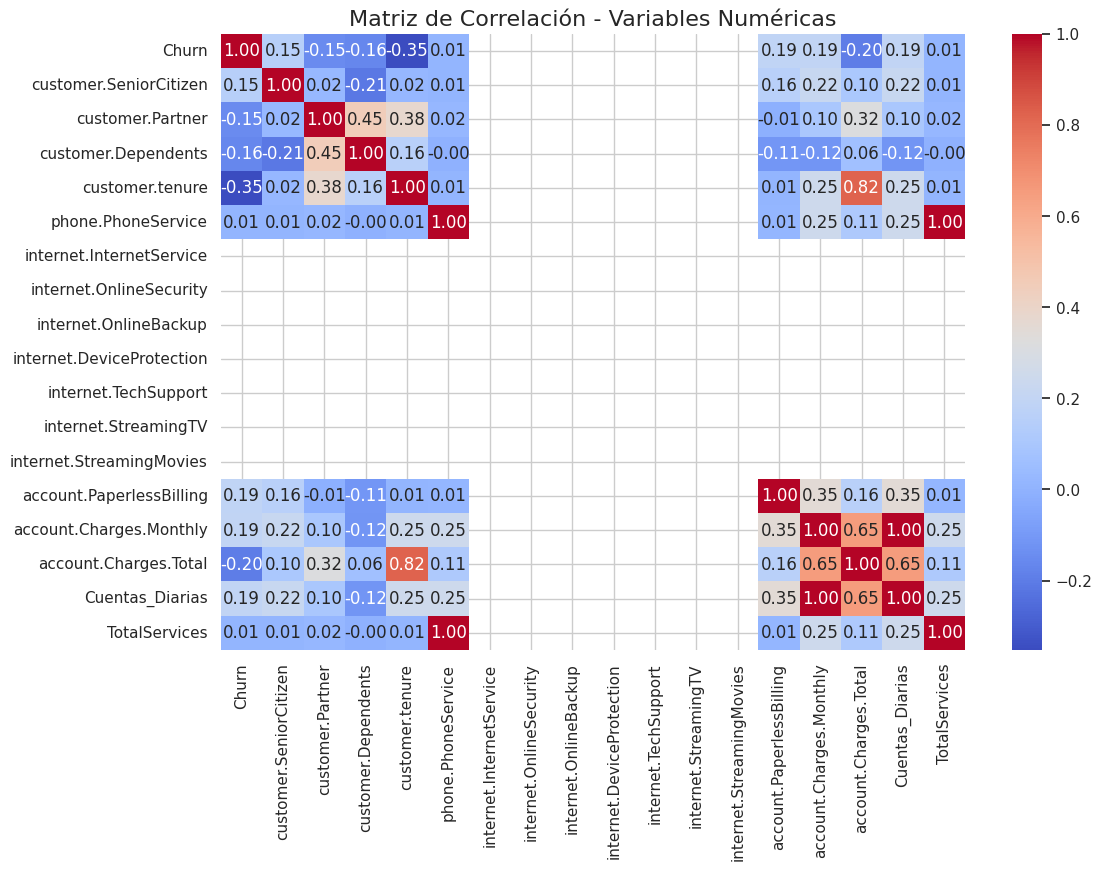

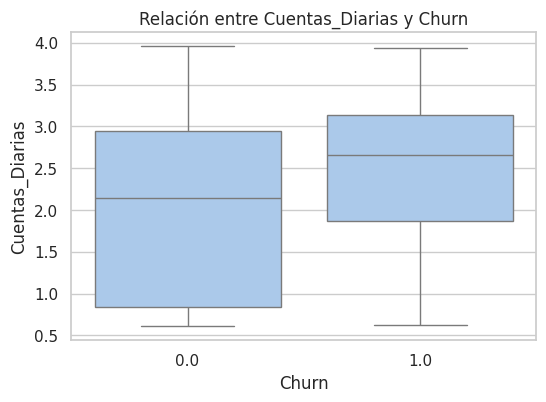

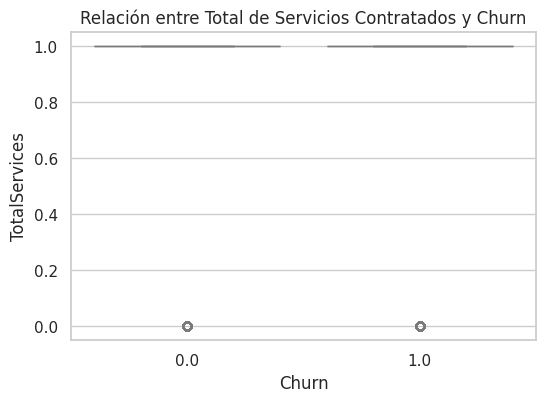

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables numéricas para la correlación
numeric_df = df.select_dtypes(include=['float64', 'int64', 'Float64']) # Include Float64 for Churn

# Calcular matriz de correlación
corr_matrix = numeric_df.corr()

# Mostrar correlación con 'Churn' si está codificada como 0/1
if 'Churn' in numeric_df.columns:
    churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
    print("Correlación de variables con Churn:")
    print(churn_corr)

# Visualizar matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=16)
plt.show()

# Ejemplo: Relación entre Cuentas_Diarias y Churn
if 'Cuentas_Diarias' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y='Cuentas_Diarias')
    plt.title("Relación entre Cuentas_Diarias y Churn")
    plt.show()

# Example: Number of contracted services vs Churn
service_cols = ['phone.PhoneService', 'internet.InternetService', 'internet.OnlineSecurity',
                'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                'internet.StreamingTV', 'internet.StreamingMovies']

# Convertir Sí/No a 1/0 if necessary
for col in service_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].map({'yes': 1, 'no': 0, 'no internet service': 0, 'no phone service': 0}) # Map more values

# Crear columna de total de servicios contratados
# Select only the service columns that exist in the DataFrame and are numeric
numeric_service_cols = [col for col in service_cols if col in df.columns and df[col].dtype in ['int64', 'float64', 'Float64']]
if numeric_service_cols:
    df['TotalServices'] = df[numeric_service_cols].sum(axis=1)

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y='TotalServices')
    plt.title("Relación entre Total de Servicios Contratados y Churn")
    plt.show()